In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('crops.csv')
df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [3]:
df_copy = df.copy()
df_copy.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [4]:
df_copy.drop(labels=['ID'], axis=1, inplace=True)
df_copy.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1


In [5]:
df_copy.rename({'Estimated_Insects_Count': 'numero_insetos',
                'Crop_Type': 'tipo_plantacao',
                'Soil_Type': 'tipo_solo',
                'Pesticide_Use_Category': 'tipo_pesticida',
                'Number_Doses_Week': 'qtd_doses_pesticida_semana',
                'Number_Weeks_Used': 'qtd_semanas_uso_pesticida',
                'Number_Weeks_Quit': 'qtd_semanas_quit',
                'Season': 'epoca_ano',
                'Crop_Damage': 'dano_plantacao'}, axis=1, inplace=True)
df_copy.head()

,numero_insetos,tipo_plantacao,tipo_solo,tipo_pesticida,qtd_doses_pesticida_semana,qtd_semanas_uso_pesticida,qtd_semanas_quit,epoca_ano,dano_plantacao
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1


In [6]:
df_copy.info()
# a coluna qtd_semanas_uso_pesticida tem muitos valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   numero_insetos              88858 non-null  int64  
 1   tipo_plantacao              88858 non-null  int64  
 2   tipo_solo                   88858 non-null  int64  
 3   tipo_pesticida              88858 non-null  int64  
 4   qtd_doses_pesticida_semana  88858 non-null  int64  
 5   qtd_semanas_uso_pesticida   79858 non-null  float64
 6   qtd_semanas_quit            88858 non-null  int64  
 7   epoca_ano                   88858 non-null  int64  
 8   dano_plantacao              88858 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 6.1 MB


In [7]:
# Quantidade de plantacoes boa, media e ruim
df_copy['dano_plantacao'].value_counts()

0    74238
1    12307
2     2313
Name: dano_plantacao, dtype: int64

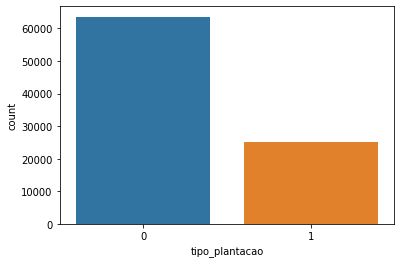

In [8]:
sns.countplot(df_copy['tipo_plantacao']);

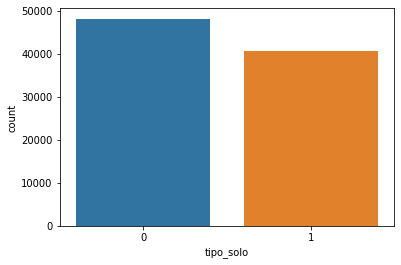

In [9]:
sns.countplot(df_copy['tipo_solo']);

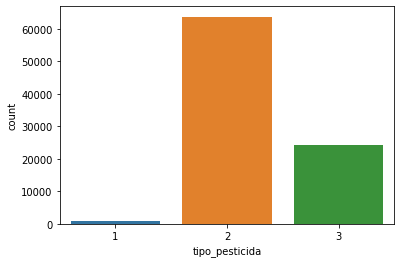

In [10]:
sns.countplot(df_copy['tipo_pesticida']);

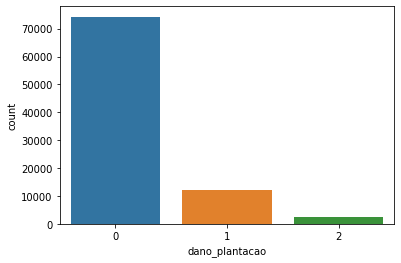

In [11]:
sns.countplot(df_copy['dano_plantacao']);
# 0 - Boa
# 1 - Média
# 2 - Ruim

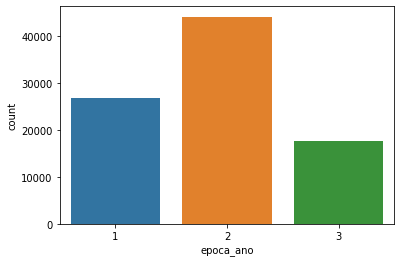

In [12]:
sns.countplot(df_copy['epoca_ano']);
# 1 - Janeiro a Abril
# 2 - Maio a Agosto
# 3 - Setembro a Dezembro

In [13]:
df_copy.isnull().sum()
# a coluna qtd_semanas_uso_pesticida tem 9000 valores nulos

numero_insetos                   0
tipo_plantacao                   0
tipo_solo                        0
tipo_pesticida                   0
qtd_doses_pesticida_semana       0
qtd_semanas_uso_pesticida     9000
qtd_semanas_quit                 0
epoca_ano                        0
dano_plantacao                   0
dtype: int64

In [14]:
# Excluindo valores nulos
df_copy.dropna(inplace=True)

In [15]:
df_copy.isnull().sum()

numero_insetos                0
tipo_plantacao                0
tipo_solo                     0
tipo_pesticida                0
qtd_doses_pesticida_semana    0
qtd_semanas_uso_pesticida     0
qtd_semanas_quit              0
epoca_ano                     0
dano_plantacao                0
dtype: int64

In [16]:
df_copy.duplicated().sum()

623

In [17]:
# Excluindo valores duplicados
df_copy.drop_duplicates(inplace=True)

In [18]:
df_copy.duplicated().sum()

0

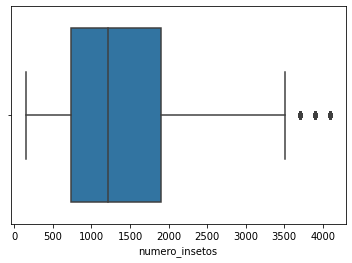

In [19]:
sns.boxplot(x=df_copy['numero_insetos']);
# o numero medio de insetos ficou na casa dos 1200
# retirar os outliers melhora o desempenho do algoritmo

In [20]:
# Removendo os outliers
q_menor = df_copy['numero_insetos'].quantile(0.01)
q_maior = df_copy['numero_insetos'].quantile(0.99)
df_copy = df_copy[(df_copy['numero_insetos'] < q_maior) & (df_copy['numero_insetos'] > q_menor)]

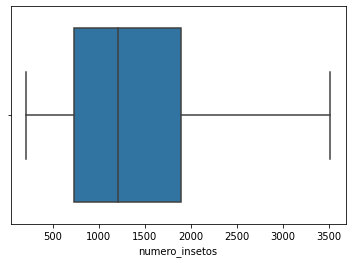

In [21]:
# outliers removidos
sns.boxplot(x=df_copy['numero_insetos']);

In [22]:
df_copy.head()

,numero_insetos,tipo_plantacao,tipo_solo,tipo_pesticida,qtd_doses_pesticida_semana,qtd_semanas_uso_pesticida,qtd_semanas_quit,epoca_ano,dano_plantacao
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1
7,577,1,0,1,0,0.0,0,1,2


In [23]:
X = df_copy.iloc[:, 0:8].values
X.shape

(76885, 8)

In [24]:
y = df_copy.iloc[:, 8].values
y.shape

(76885,)

In [25]:
# Testes com os algoritmos KNN, Naive Bayes e Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [26]:
# Serão feitos 5 testes para cada algoritmo
# A cada teste feito o seu accuracy vai ser armazenada na respectva lista do algoritmo
# Ao final será obtiada a média da lista de cada algoritmo e essa média será reportada
# test_size faz com que os dados sejam divididos em 80% para treino e 20% para teste
# o random_state = i faz com que sejam selecionados valores diferentes a cada iteração
# stratify faz a divisão proporcional y com base na quantidade de cada valor possível
def treino_teste(x, y):
    resultados_naive_b = []
    resultados_knn = []
    resultados_lr = []
    for i in range(5):
        X_treino, X_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2,
                                                                stratify=y,
                                                                random_state=i)
        naive_b = GaussianNB()
        naive_b.fit(X_treino, y_treino)
        resultados_naive_b.append(accuracy_score(y_teste, naive_b.predict(X_teste)))

        knn = KNeighborsClassifier()
        knn.fit(X_treino, y_treino)
        resultados_knn.append(accuracy_score(y_teste, knn.predict(X_teste)))
        
        logistic_r = LogisticRegression()
        logistic_r.fit(X_treino, y_treino)
        resultados_lr.append(accuracy_score(y_teste, logistic_r.predict(X_teste)))
    resultados_naive_b = np.array(resultados_naive_b)
    resultados_knn = np.array(resultados_knn)
    resultados_lr = np.array(resultados_lr)
    media_naive_b = resultados_naive_b.mean()
    media_knn = resultados_knn.mean()
    media_lr = resultados_lr.mean()
    return media_naive_b, media_knn, media_lr, logistic_r

In [27]:
media_naive_b, media_knn, media_lr, logistic_r = treino_teste(X, y)
media_naive_b, media_knn, media_lr

(0.8245431488586851, 0.8276386811471678, 0.842010795343695)

In [28]:
# salvando o modelo no disco
import joblib
modelo = 'modelo_ml_colheitas.sav'
joblib.dump(logistic_r, modelo)

['modelo_ml_colheitas.sav']

In [29]:
def gera_grafico(media_naive_b, media_knn, media_lr):
    medias_df = pd.DataFrame({'Algoritmos': ['Naive Bayes', 'KNN', 'Logistic Regression'],
                             'Porcentagens': [round(media_naive_b*100, 1), round(media_knn*100, 1), round(media_lr*100, 1)]})
    print(medias_df)
    plt.grid()
    ax = sns.barplot(x='Porcentagens', y='Algoritmos', data=medias_df)
    ax.set_ylabel('Algoritmos')
    plt.show()

            Algoritmos  Porcentagens
0          Naive Bayes          82.5
1                  KNN          82.8
2  Logistic Regression          84.2


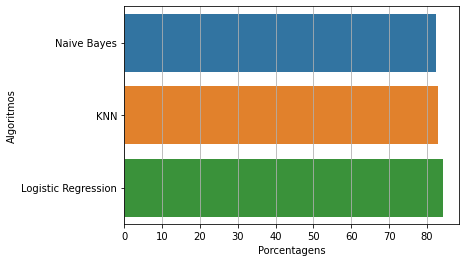

In [30]:
gera_grafico(media_naive_b, media_knn, media_lr)

Próximos passos:

*   Subamostragem e Sobreamostragem
*   Seleção de atributos mais eficazes com Qui quadrado
*   One-hot encoder
*   Utilizar cross validation em vez de train test split


## Subamostragem

In [31]:
from imblearn.under_sampling import TomekLinks

In [32]:
tl = TomekLinks()
X_under, y_under = tl.fit_sample(X, y)

In [33]:
X_under.shape, y_under.shape

((69561, 8), (69561,))

In [34]:
media_naive_b, media_knn, media_lr, logistic_r = treino_teste(X_under, y_under)
media_naive_b, media_knn, media_lr

(0.8603033134478546, 0.8712570976784303, 0.8772946165456768)

            Algoritmos  Porcentagens
0          Naive Bayes          86.0
1                  KNN          87.1
2  Logistic Regression          87.7


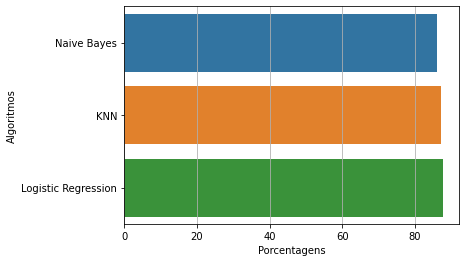

In [35]:
gera_grafico(media_naive_b, media_knn, media_lr)

In [36]:
modelo = 'modelo_ml_colheitas.sav'
joblib.dump(logistic_r, modelo)

['modelo_ml_colheitas.sav']

## Sobreamostragem

In [37]:
from imblearn.over_sampling import SMOTE

In [38]:
smote = SMOTE()
X_over, y_over = smote.fit_sample(X, y)

In [39]:
X_over.shape, y_over.shape

((194580, 8), (194580,))

In [41]:
media_naive_b, media_knn, media_lr, modelo_teste = treino_teste(X_over, y_over)
media_naive_b, media_knn, media_lr

(0.5178538390379278, 0.8102836879432624, 0.5031606537156954)

            Algoritmos  Porcentagens
0          Naive Bayes          51.8
1                  KNN          81.0
2  Logistic Regression          50.3


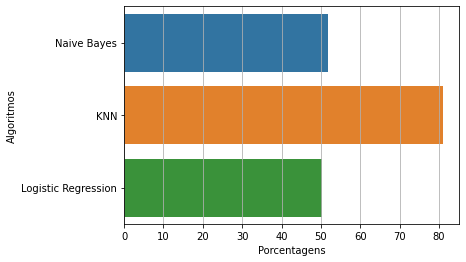

In [42]:
gera_grafico(media_naive_b, media_knn, media_lr)

## Seleção de atributos com Qui Quadrado

In [43]:
df_copy.head()

,numero_insetos,tipo_plantacao,tipo_solo,tipo_pesticida,qtd_doses_pesticida_semana,qtd_semanas_uso_pesticida,qtd_semanas_quit,epoca_ano,dano_plantacao
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1
7,577,1,0,1,0,0.0,0,1,2


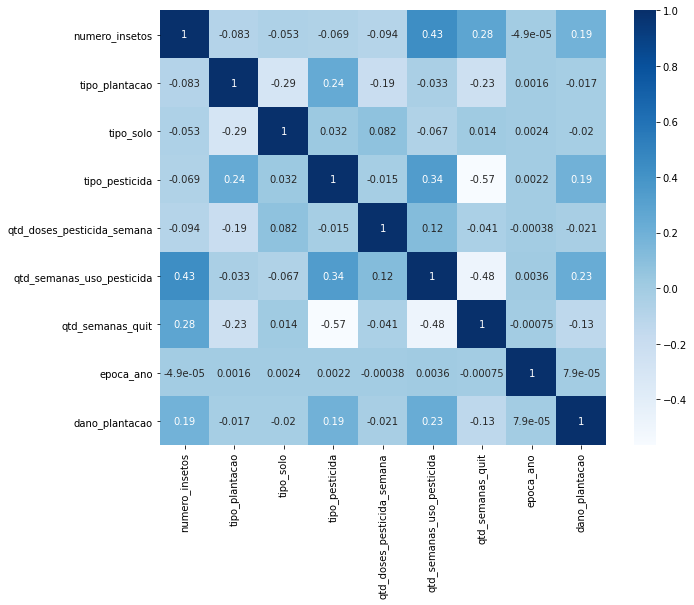

In [44]:
plt.figure(figsize=(10,8))
sns.heatmap(df_copy.corr(), annot=True, cmap='Blues')

In [45]:
from sklearn.feature_selection import SelectFdr
from sklearn.feature_selection import chi2

In [46]:
selecao = SelectFdr(chi2, alpha=0.01)
X_novo_u = selecao.fit_transform(X_under, y_under)

In [142]:
X_under.shape, X_novo_u.shape

((69561, 8), (69561, 7))

In [48]:
media_naive_b, media_knn, media_lr, modelo_teste = treino_teste(X_novo_u, y_under)
media_naive_b, media_knn, media_lr

(0.8603033134478546, 0.8717170991159348, 0.8768058650183281)

            Algoritmos  Porcentagens
0          Naive Bayes          86.0
1                  KNN          87.2
2  Logistic Regression          87.7


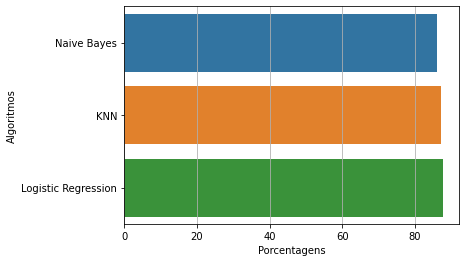

In [49]:
gera_grafico(media_naive_b, media_knn, media_lr)

## One-hot encoder

In [50]:
df_copy.head()

,numero_insetos,tipo_plantacao,tipo_solo,tipo_pesticida,qtd_doses_pesticida_semana,qtd_semanas_uso_pesticida,qtd_semanas_quit,epoca_ano,dano_plantacao
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1
7,577,1,0,1,0,0.0,0,1,2


In [51]:
for col in ['tipo_plantacao', 'tipo_solo', 'tipo_pesticida', 'epoca_ano']:
    df_copy = pd.get_dummies(df_copy, columns=[col])

In [52]:
df_copy.head()

,numero_insetos,qtd_doses_pesticida_semana,qtd_semanas_uso_pesticida,qtd_semanas_quit,dano_plantacao,tipo_plantacao_0,tipo_plantacao_1,tipo_solo_0,tipo_solo_1,tipo_pesticida_1,tipo_pesticida_2,tipo_pesticida_3,epoca_ano_1,epoca_ano_2,epoca_ano_3
1,209,0,0.0,0,1,0,1,1,0,1,0,0,0,1,0
2,257,0,0.0,0,1,0,1,1,0,1,0,0,0,1,0
3,257,0,0.0,0,1,0,1,0,1,1,0,0,0,1,0
4,342,0,0.0,0,1,0,1,1,0,1,0,0,0,1,0
7,577,0,0.0,0,2,0,1,1,0,1,0,0,1,0,0


In [53]:
df_copy.shape

(76885, 15)

In [54]:
X = df_copy.drop(['dano_plantacao'], axis=1)
y = df_copy['dano_plantacao'].values.reshape(-1,1)

In [55]:
X

,numero_insetos,qtd_doses_pesticida_semana,qtd_semanas_uso_pesticida,qtd_semanas_quit,tipo_plantacao_0,tipo_plantacao_1,tipo_solo_0,tipo_solo_1,tipo_pesticida_1,tipo_pesticida_2,tipo_pesticida_3,epoca_ano_1,epoca_ano_2,epoca_ano_3
1,209,0,0.0,0,0,1,1,0,1,0,0,0,1,0
2,257,0,0.0,0,0,1,1,0,1,0,0,0,1,0
3,257,0,0.0,0,0,1,0,1,1,0,0,0,1,0
4,342,0,0.0,0,0,1,1,0,1,0,0,0,1,0
7,577,0,0.0,0,0,1,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88851,3164,10,11.0,36,0,1,1,0,0,1,0,1,0,0
88852,3165,60,44.0,15,0,1,1,0,0,1,0,0,1,0
88853,3337,10,12.0,44,0,1,1,0,0,1,0,0,0,1
88854,3516,10,20.0,38,0,1,1,0,0,1,0,1,0,0


In [56]:
X_under, y_under = tl.fit_sample(X, y)

## One-hot enconder + Subamostragem

In [58]:
media_naive_b, media_knn, media_lr, modelo_teste = treino_teste(X_under, y_under)
media_naive_b, media_knn, media_lr

(0.8672118098270497, 0.8757363050871987, 0.879383457558434)

            Algoritmos  Porcentagens
0          Naive Bayes          86.7
1                  KNN          87.6
2  Logistic Regression          87.9


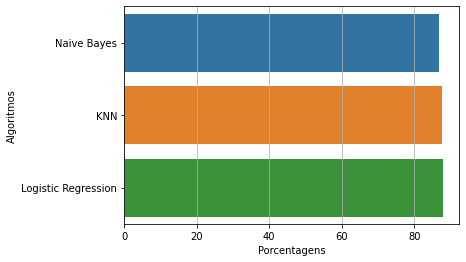

In [59]:
gera_grafico(media_naive_b, media_knn, media_lr)

## Cross validation + Subamostragem + One-Hot-Encoder

In [60]:
from sklearn.model_selection import cross_val_score, KFold

In [61]:
def treino_teste_cross(x, y):
    resultados_nb_cv = []
    resultados_nb_cv_300 = []
    resultados_lr_cv = []
    resultados_lr_cv_300 = []
    resultados_knn_cv = []
    resultados_knn_cv_300 = []
    for i in range(30):
      kfold = KFold(n_splits = 10, shuffle = True, random_state = i)

      naive_bayes = GaussianNB()
      scores = cross_val_score(naive_bayes, x, y, cv = kfold)
      resultados_nb_cv_300.append(scores)
      resultados_nb_cv.append(scores.mean())
      resultados_nb = np.array(resultados_nb_cv)
      media_nb = resultados_nb.mean()

      logistica = LogisticRegression()
      scores = cross_val_score(logistica, x, y, cv = kfold)
      resultados_lr_cv_300.append(scores)
      resultados_lr_cv.append(scores.mean())
      resultados_lr = np.array(resultados_lr_cv)
      media_lr = resultados_lr.mean()

      knn = KNeighborsClassifier()
      scores = cross_val_score(knn, x, y, cv = kfold)
      resultados_knn_cv_300.append(scores)
      resultados_knn_cv.append(scores.mean())
      resultados_knn = np.array(resultados_knn_cv)
      media_knn = resultados_knn.mean()
    return media_nb, media_knn, media_lr, logistica

In [62]:
media_nb, media_knn, media_lr, logistic_r = treino_teste_cross(X_under, y_under)

            Algoritmos  Porcentagens
0          Naive Bayes          86.7
1                  KNN          87.5
2  Logistic Regression          87.9


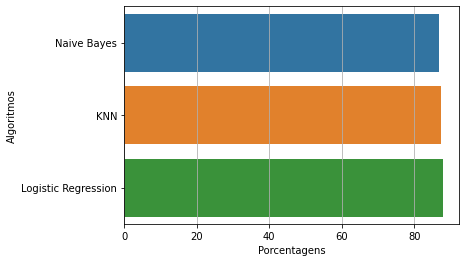

In [63]:
gera_grafico(media_nb, media_knn, media_lr)